**SPAM SMS DETECTION**




Import Packages

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

Load Data

---

In [ ]:
data_path = '/content/spam.csv'
df = pd.read_csv(data_path, encoding='latin-1')

In [ ]:
print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


Clean The Data

---

In [ ]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

<ipython-input-8-19f49626acc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


Split the data into training and testing sets

---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [ ]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 4457
Testing set size: 1115


Convert the text data to numerical format using TF-IDF

---

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Convert the text data to numerical format using CountVectorizer

---

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

Exploratory Data Analysis

---

In [ ]:
class_distribution = df['label'].value_counts()
print(class_distribution)

label
0    4825
1     747
Name: count, dtype: int64


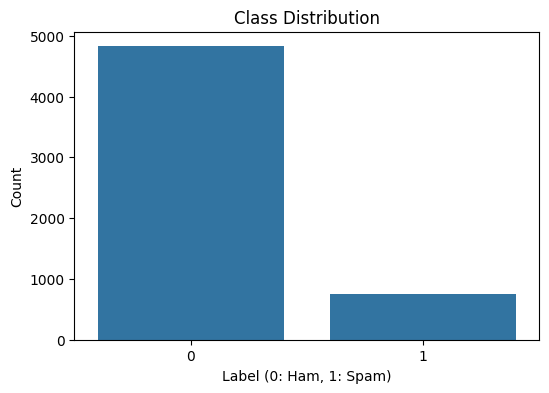

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

In [ ]:
df['message_length'] = df['message'].apply(len)

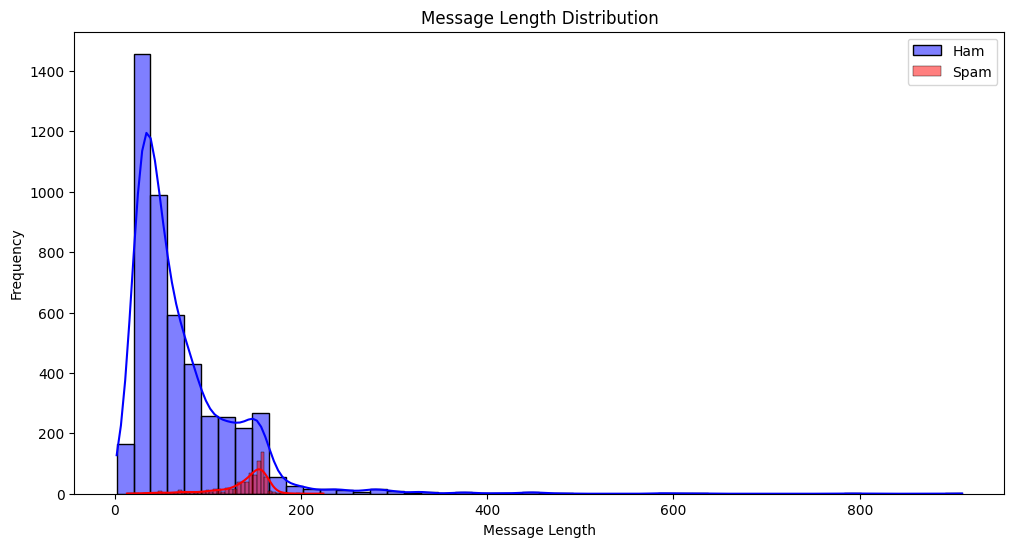

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['message_length'], bins=50, label='Ham', color='blue', kde=True)
sns.histplot(df[df['label'] == 1]['message_length'], bins=50, label='Spam', color='red', kde=True)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
print(df.groupby('label')['message_length'].describe())

        count        mean        std   min    25%    50%    75%    max
label                                                                 
0      4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
1       747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0


Visualizing the transformed data

---

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_counts.toarray())

In [ ]:
tsne_df = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
tsne_df['label'] = y_train.values

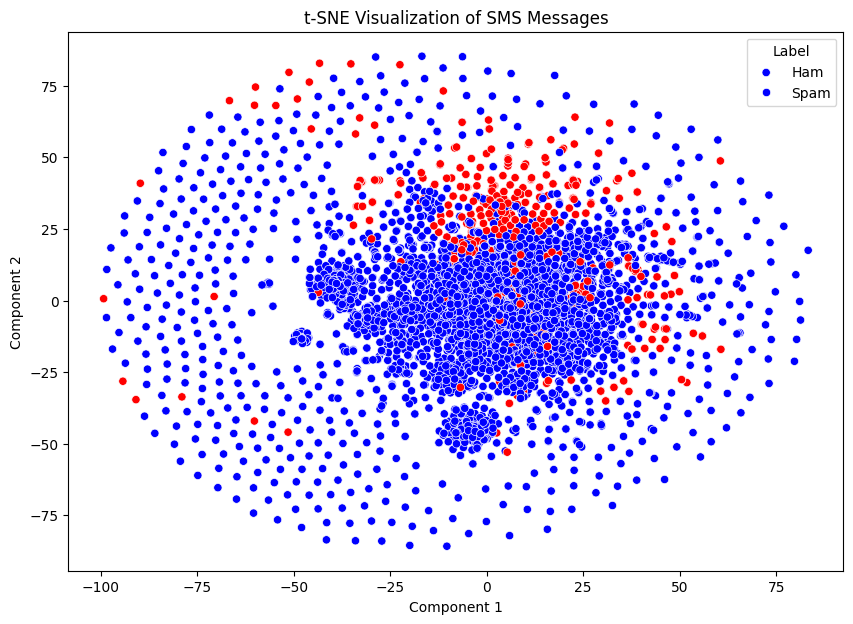

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Component 1', y='Component 2', hue='label', data=tsne_df, palette=['blue', 'red'], legend='full')
plt.title('t-SNE Visualization of SMS Messages')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Label', labels=['Ham', 'Spam'])
plt.show()

Building our ML model

---

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)
y_pred_nb = nb_classifier.predict(X_test_counts)
print("Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classifier
Accuracy: 0.9829596412556054
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.95      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_counts, y_train)
y_pred_lr = lr_classifier.predict(X_test_counts)
print("Logistic Regression Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classifier
Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train_counts, y_train)
y_pred_svm = svm_classifier.predict(X_test_counts)
print("SVM Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Classifier
Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Evaluating the best model on test set

---

In [ ]:
metrics = {
    'Naive Bayes': {
        'Accuracy': accuracy_score(y_test, y_pred_nb),
        'Classification Report': classification_report(y_test, y_pred_nb, output_dict=True)
    },
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'Classification Report': classification_report(y_test, y_pred_lr, output_dict=True)
    },
    'SVM': {
        'Accuracy': accuracy_score(y_test, y_pred_svm),
        'Classification Report': classification_report(y_test, y_pred_svm, output_dict=True)
    }
}

In [ ]:
for model, metric in metrics.items():
    print(f"\n{model} Classifier")
    print("Accuracy:", metric['Accuracy'])
    print("Classification Report:\n", metric['Classification Report'])


Naive Bayes Classifier
Accuracy: 0.9829596412556054
Classification Report:
 {'0': {'precision': 0.9876288659793815, 'recall': 0.9927461139896373, 'f1-score': 0.9901808785529717, 'support': 965}, '1': {'precision': 0.9517241379310345, 'recall': 0.92, 'f1-score': 0.9355932203389831, 'support': 150}, 'accuracy': 0.9829596412556054, 'macro avg': {'precision': 0.969676501955208, 'recall': 0.9563730569948187, 'f1-score': 0.9628870494459774, 'support': 1115}, 'weighted avg': {'precision': 0.9827986335065096, 'recall': 0.9829596412556054, 'f1-score': 0.9828372474031077, 'support': 1115}}

Logistic Regression Classifier
Accuracy: 0.979372197309417
Classification Report:
 {'0': {'precision': 0.9767206477732794, 'recall': 1.0, 'f1-score': 0.9882232462877625, 'support': 965}, '1': {'precision': 1.0, 'recall': 0.8466666666666667, 'f1-score': 0.9169675090252708, 'support': 150}, 'accuracy': 0.979372197309417, 'macro avg': {'precision': 0.9883603238866396, 'recall': 0.9233333333333333, 'f1-score': 0